In [7]:
import pandas as pd
from fbprophet import Prophet
from pathlib import Path

In [8]:
df = pd.read_csv(Path('..\Data\\eth-usd-max.csv'))[['snapped_at', 'price']]
df.head()

,snapped_at,price
0,2015-08-07 00:00:00 UTC,2.831620
1,2015-08-08 00:00:00 UTC,1.330750
2,2015-08-10 00:00:00 UTC,0.687586
3,2015-08-11 00:00:00 UTC,1.067379
4,2015-08-12 00:00:00 UTC,1.256613


In [9]:
df.rename(columns={'snapped_at': 'ds', 'price': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
df = df.loc[df['ds'].dt.year >= 2021]
df.head()

,ds,y
1242,2019-01-01,131.458725
1243,2019-01-02,138.144802
1244,2019-01-03,152.860453
1245,2019-01-04,146.730599
1246,2019-01-05,153.056567


In [10]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2019-01-01,-24.001793,-245.736912,205.050643
1,2019-01-02,-10.426649,-247.271440,227.039638
2,2019-01-03,-0.073617,-239.435427,255.240819
3,2019-01-04,5.335002,-220.414611,234.038760
4,2019-01-05,12.031230,-218.390568,240.303964


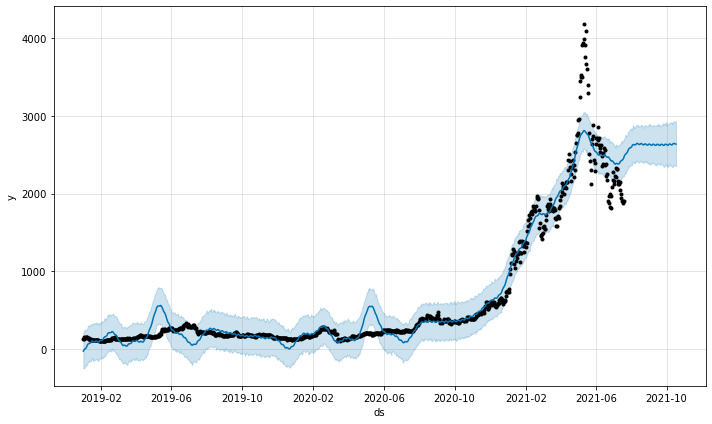

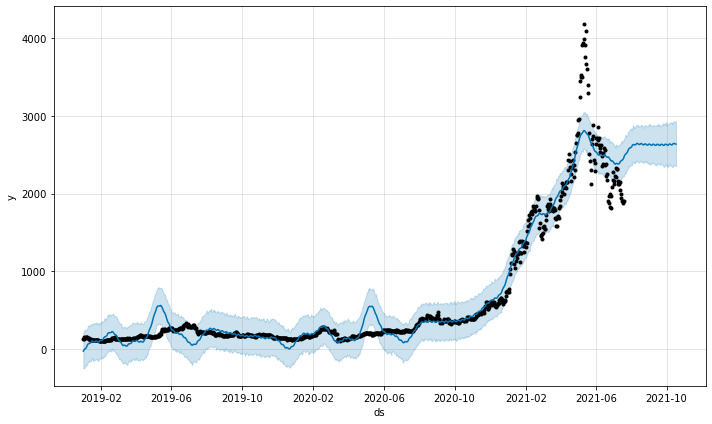

In [11]:
m.plot(forecast)

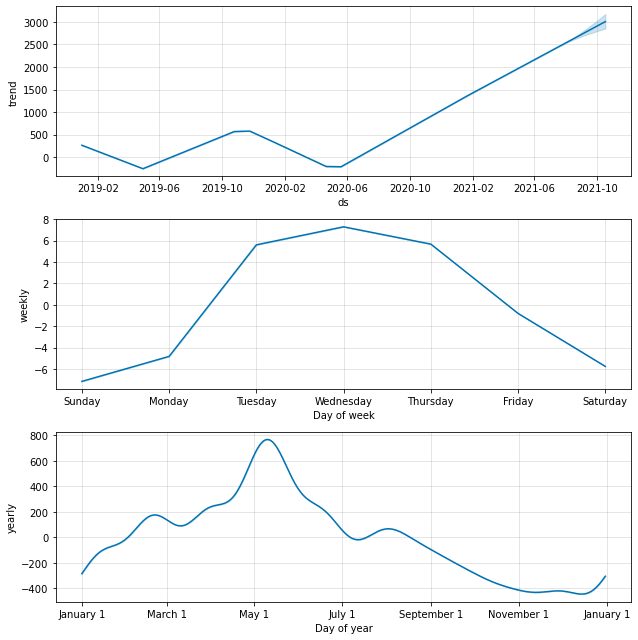

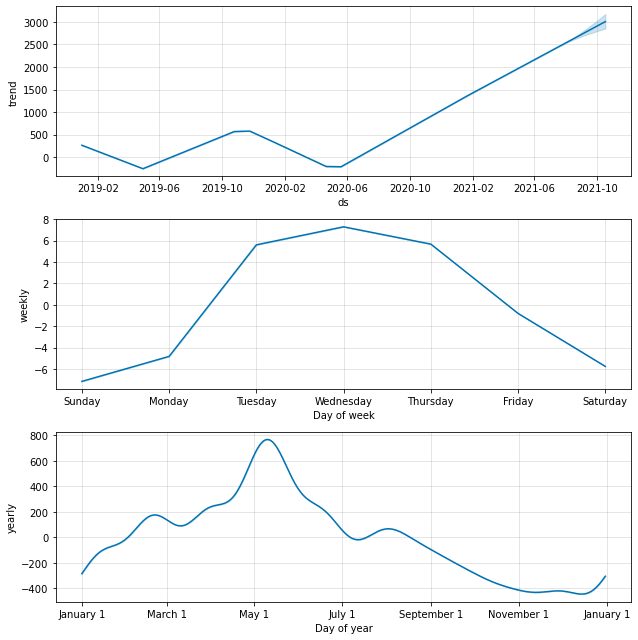

In [12]:
m.plot_components(forecast)